In [1]:
import qiskit
import numpy as np
import math
from qiskit import *
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi

# Question 1

### Problem(a)

In [15]:

q = QuantumRegister(5)
c = ClassicalRegister(5)
print("(x0,x1,x2,x3){ y     : counts}")
for i in [1, 0]:
    for j in [1, 0]:
        for k in [1, 0]:
            for l in [1, 0]:
                const_oracle = QuantumCircuit(q, c)
                if i: const_oracle.x(0)
                if j: const_oracle.x(1)
                if k: const_oracle.x(2)
                if l: const_oracle.x(3)
                for n in range(0, 5):
                    const_oracle.i(n)
                const_oracle.measure(q, c)
                simulator = Aer.get_backend('qasm_simulator')
                job = execute(const_oracle, simulator, shots = 10000)
                result = job.result()
                counts = result.get_counts()
                print((l, k, j, i), counts)


(x0,x1,x2,x3){ y     : counts}
(1, 1, 1, 1) {'01111': 10000}
(0, 1, 1, 1) {'00111': 10000}
(1, 0, 1, 1) {'01011': 10000}
(0, 0, 1, 1) {'00011': 10000}
(1, 1, 0, 1) {'01101': 10000}
(0, 1, 0, 1) {'00101': 10000}
(1, 0, 0, 1) {'01001': 10000}
(0, 0, 0, 1) {'00001': 10000}
(1, 1, 1, 0) {'01110': 10000}
(0, 1, 1, 0) {'00110': 10000}
(1, 0, 1, 0) {'01010': 10000}
(0, 0, 1, 0) {'00010': 10000}
(1, 1, 0, 0) {'01100': 10000}
(0, 1, 0, 0) {'00100': 10000}
(1, 0, 0, 0) {'01000': 10000}
(0, 0, 0, 0) {'00000': 10000}


In [16]:
q = QuantumRegister(5)
c = ClassicalRegister(5)
print("(x0,x1,x2,x3){ y     : counts}")
for i in [1, 0]:
    for j in [1, 0]:
        for k in [1, 0]:
            for l in [1, 0]:
                const_oracle = QuantumCircuit(q, c)
                if i: const_oracle.x(0)
                if j: const_oracle.x(1)
                if k: const_oracle.x(2)
                if l: const_oracle.x(3)
                for n in range(0, 5):
                    const_oracle.i(n)
                const_oracle.x(4)
                const_oracle.measure(q, c)
                simulator = Aer.get_backend('qasm_simulator')
                job = execute(const_oracle, simulator, shots = 10000)
                result = job.result()
                counts = result.get_counts()
                print((l, k, j, i), counts)

(x0,x1,x2,x3){ y     : counts}
(1, 1, 1, 1) {'11111': 10000}
(0, 1, 1, 1) {'10111': 10000}
(1, 0, 1, 1) {'11011': 10000}
(0, 0, 1, 1) {'10011': 10000}
(1, 1, 0, 1) {'11101': 10000}
(0, 1, 0, 1) {'10101': 10000}
(1, 0, 0, 1) {'11001': 10000}
(0, 0, 0, 1) {'10001': 10000}
(1, 1, 1, 0) {'11110': 10000}
(0, 1, 1, 0) {'10110': 10000}
(1, 0, 1, 0) {'11010': 10000}
(0, 0, 1, 0) {'10010': 10000}
(1, 1, 0, 0) {'11100': 10000}
(0, 1, 0, 0) {'10100': 10000}
(1, 0, 0, 0) {'11000': 10000}
(0, 0, 0, 0) {'10000': 10000}


In [17]:
q = QuantumRegister(5)
c = ClassicalRegister(5)
print("(x0,x1,x2,x3){ y     : counts}")
for i in [1, 0]:
    for j in [1, 0]:
        for k in [1, 0]:
            for l in [1, 0]:
                const_oracle = QuantumCircuit(q, c)
                if i: const_oracle.x(0)
                if j: const_oracle.x(1)
                if k: const_oracle.x(2)
                if l: const_oracle.x(3)
                const_oracle.cx(q[0], q[4])
                const_oracle.cx(q[1], q[4])
                const_oracle.cx(q[2], q[4])
                const_oracle.cx(q[3], q[4])
                if i: const_oracle.x(0)
                if j: const_oracle.x(1)
                if k: const_oracle.x(2)
                if l: const_oracle.x(3)
                const_oracle.measure(q, c)
                simulator = Aer.get_backend('qasm_simulator')
                job = execute(const_oracle, simulator, shots = 10000)
                result = job.result()
                counts = result.get_counts()
                print((l, k, j, i), counts)


(x0,x1,x2,x3){ y     : counts}
(1, 1, 1, 1) {'00000': 10000}
(0, 1, 1, 1) {'10000': 10000}
(1, 0, 1, 1) {'10000': 10000}
(0, 0, 1, 1) {'00000': 10000}
(1, 1, 0, 1) {'10000': 10000}
(0, 1, 0, 1) {'00000': 10000}
(1, 0, 0, 1) {'00000': 10000}
(0, 0, 0, 1) {'10000': 10000}
(1, 1, 1, 0) {'10000': 10000}
(0, 1, 1, 0) {'00000': 10000}
(1, 0, 1, 0) {'00000': 10000}
(0, 0, 1, 0) {'10000': 10000}
(1, 1, 0, 0) {'00000': 10000}
(0, 1, 0, 0) {'10000': 10000}
(1, 0, 0, 0) {'10000': 10000}
(0, 0, 0, 0) {'00000': 10000}


### Problem(b)

In [18]:
# Reference: https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html

def dj_oracle(case, n=4):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

def dj_algorithm(oracle, n=4):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw()

┌───┐     ┌─────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├─────────
     ├───┤     │         │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├──────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 Oracle ├┤ H ├─╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4        ├──────╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║ 
c: 4/═══════════════════════════╩══╩══╩══╩═
                                0  1  2  3

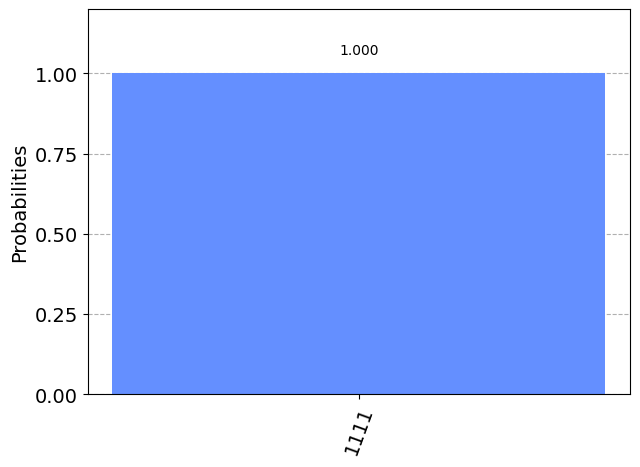

In [19]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
qobj = assemble(transpiled_dj_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

In [20]:
n = 4
oracle_gate = dj_oracle('constant', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw()

┌───┐     ┌─────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├─────────
     ├───┤     │         │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├──────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 Oracle ├┤ H ├─╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4        ├──────╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║ 
c: 4/═══════════════════════════╩══╩══╩══╩═
                                0  1  2  3

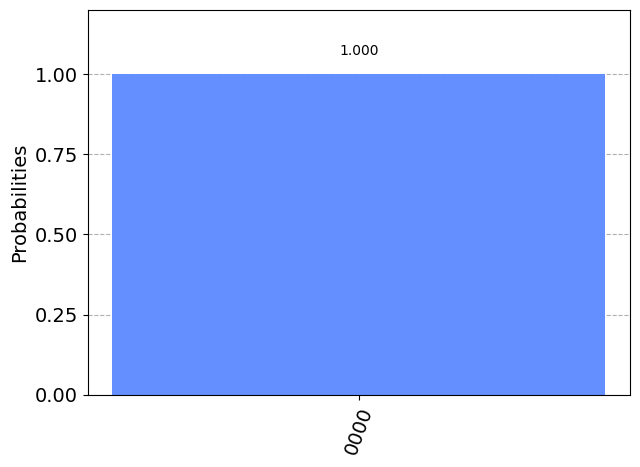

In [21]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
qobj = assemble(transpiled_dj_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

# Question 2

### Problem (a)

In [97]:
initial_state = [[1, 0], [1/sqrt(2), 1/sqrt(2)], [0, 1]]
q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q,c)
for i in range(3):
    qc.initialize(initial_state[i], i)
qc.x(q[3])
qc.h(q[3])
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

Statevector([ 0. +0.000000e+00j,  0. +0.000000e+00j,  0. +0.000000e+00j,
              0. +0.000000e+00j,  0.5+0.000000e+00j,  0. +0.000000e+00j,
              0.5+0.000000e+00j,  0. +0.000000e+00j,  0. +0.000000e+00j,
              0. +0.000000e+00j,  0. +0.000000e+00j,  0. +0.000000e+00j,
             -0.5-6.123234e-17j,  0. +0.000000e+00j, -0.5-6.123234e-17j,
              0. +0.000000e+00j],
            dims=(2, 2, 2, 2))


In [98]:
initial_state = [[1, 0], [1/sqrt(2), 1/sqrt(2)], [0, 1]]
q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q,c)
for i in range(3):
    qc.initialize(initial_state[i], i)
qc.x(q[3])
qc.h(q[3])
qc.barrier()
qc.x(q[0])
qc.mct(list(range(3)), 3)
qc.x(q[0])
qc.draw()

┌─────────────────┐            ░ ┌───┐     ┌───┐
q874_0: ──────┤ Initialize(1,0) ├────────────░─┤ X ├──■──┤ X ├
        ┌─────┴─────────────────┴─────┐      ░ └───┘  │  └───┘
q874_1: ┤ Initialize(0.70711,0.70711) ├──────░────────■───────
        └─────┬─────────────────┬─────┘      ░        │       
q874_2: ──────┤ Initialize(0,1) ├────────────░────────■───────
              └──────┬───┬──────┘      ┌───┐ ░      ┌─┴─┐     
q874_3: ─────────────┤ X ├─────────────┤ H ├─░──────┤ X ├─────
                     └───┘             └───┘ ░      └───┘     
 c38: 4/══════════════════════════════════════════════════════

In [99]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

Statevector([ 0. +0.000000e+00j,  0. +0.000000e+00j,  0. +0.000000e+00j,
              0. +0.000000e+00j,  0.5+0.000000e+00j,  0. +0.000000e+00j,
             -0.5-6.123234e-17j,  0. +0.000000e+00j,  0. +0.000000e+00j,
              0. +0.000000e+00j,  0. +0.000000e+00j,  0. +0.000000e+00j,
             -0.5-6.123234e-17j,  0. +0.000000e+00j,  0.5+0.000000e+00j,
              0. +0.000000e+00j],
            dims=(2, 2, 2, 2))


### Problem (b)

In [123]:
q = QuantumRegister(3)
amp = QuantumCircuit(q)
for i in range(3):
    amp.h(i)
    amp.x(i)

amp.h(0)
amp.mct([1,2], 0)  # multi-controlled-toffoli
amp.h(0)

for i in range(3):
    amp.x(i)
    amp.h(i)
amp.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐
q2656_0: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
         ├───┤├───┤└───┘└─┬─┘├───┤├───┤└───┘
q2656_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
         ├───┤├───┤       │  ├───┤├───┤     
q2656_2: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
         └───┘└───┘          └───┘└───┘

### Problem (c)

In [124]:
Amp = amp.to_gate()
Amp.name = "I"

In [113]:
qc = QuantumCircuit(4)
qc.x(0)
qc.mct([0,1,2], 3)
qc.x(0)
qc.draw()
oracle = qc.to_gate()
oracle.name = "Uf"

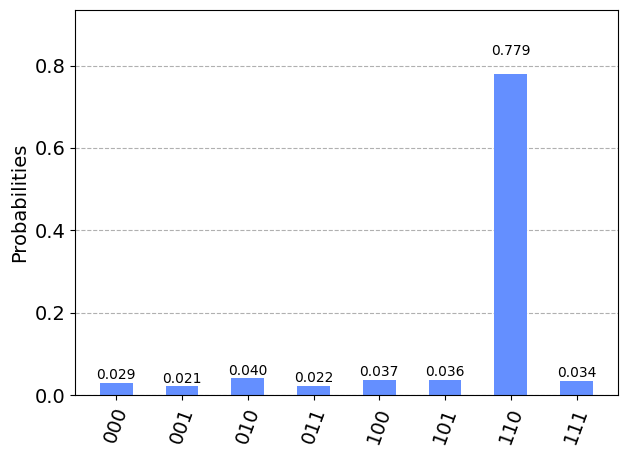

In [126]:
def iterate(iter):
    initial_state = [[1,0], [1,0], [1,0], [0,1]]
    q = QuantumRegister(4)
    c = ClassicalRegister(3)
    circuit = QuantumCircuit(q,c)
    for i in range(4):
        circuit.initialize(initial_state[i], i)
        circuit.h(i)
    circuit.barrier()
    for i in range(iter):
        circuit.append(oracle, [0,1,2,3])
        circuit.append(Amp, [0,1,2])
        circuit.barrier()
    circuit.measure([0,1,2], c)
    
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circuit, simulator, shots = 1024)
    result = job.result()
    counts = result.get_counts()
    return plot_histogram(counts)
iterate(1)

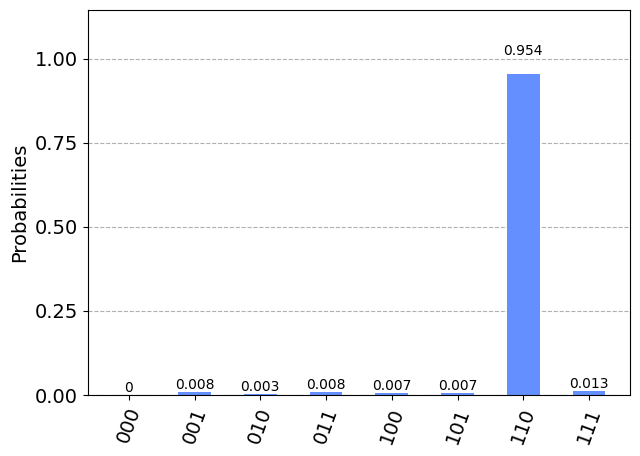

In [127]:
iterate(2)

In [120]:
all = []
def iterate(iter):
    initial_state = [[1,0], [1,0], [1,0], [0,1]]
    q = QuantumRegister(4)
    c = ClassicalRegister(3)
    circuit = QuantumCircuit(q,c)
    for i in range(4):
        circuit.initialize(initial_state[i], i)
        circuit.h(i)
    circuit.barrier()
    for i in range(iter):
        circuit.append(oracle, [0,1,2,3])
        circuit.append(Amp, [0,1,2])
        circuit.barrier()
    circuit.measure([0,1,2], c)
    
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circuit, simulator, shots = 1024)
    result = job.result()
    counts = result.get_counts()
    return counts["110"]
for i in range(1, 21):
    all.append(iterate(i)/1024)
print(all)

[0.7705078125, 0.9482421875, 0.3330078125, 0.0126953125, 0.537109375, 0.9990234375, 0.58984375, 0.01953125, 0.3134765625, 0.9228515625, 0.8046875, 0.1484375, 0.1259765625, 0.740234375, 0.966796875, 0.322265625, 0.005859375, 0.5439453125, 1.0, 0.6357421875]


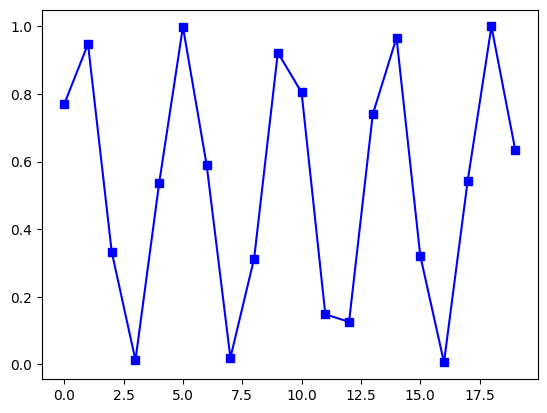

In [121]:
idx = list(range(20))
plt.plot(idx, all, 's-', color='b')

### Problem (d)

In [151]:
initial_state = [[1/sqrt(2), 1/sqrt(2)], [1,0], [0,1]]
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)
for i in range(3):
    qc.initialize(initial_state[i], i)

simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

Statevector([0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))


In [152]:
initial_state = [[1/sqrt(2), 1/sqrt(2)], [1,0], [0,1]]
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)
for i in range(3):
    qc.initialize(initial_state[i], i)
qc.cz(0,2)
qc.cz(1,0)
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)


Statevector([ 0.        +0.j,  0.        +0.j,  0.        +0.j,
             -0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
              0.        +0.j,  0.        -0.j],
            dims=(2, 2, 2))


### Problem (e)

In [247]:
q = QuantumRegister(3)
qc = QuantumCircuit(q)
qc.cz(0,2)
qc.cz(1,0)
oracle = qc.to_gate()
oracle.name = "Uf"

In [248]:
q = QuantumRegister(3)
amp = QuantumCircuit(q)
for i in range(3):
    amp.h(i)
    amp.x(i)

amp.h(0)
amp.mct([1,2], 0)  # multi-controlled-toffoli
amp.h(0)

for i in range(3):
    amp.x(i)
    amp.h(i)
Amp = amp.to_gate()
Amp.name = "I"

In [181]:
all = []
def iterate(iter):
    
    initial_state = [[1,0], [1,0], [1,0]]
    q = QuantumRegister(3)
    c = ClassicalRegister(3)
    circuit = QuantumCircuit(q,c)
    for i in range(3):
        circuit.initialize(initial_state[i], i)
        circuit.h(i)
    circuit.barrier()
    for i in range(iter):
        circuit.append(oracle, [0,1,2])
        circuit.append(Amp, [0,1,2])
        circuit.barrier()
    circuit.measure([0,1,2], c)
    
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circuit, simulator, shots = 1024)
    result = job.result()
    counts = result.get_counts()
    return counts['101'], counts['011']
new_all = []
for i in range(1, 20):
    all.append((iterate(i)[0]/1024, iterate(i)[1]/1024))
for i in range(len(all)):
    new_all.append(all[i][0])
for i in range(len(all)):
    new_all.append(all[i][1])
print(new_all)

[0.50390625, 0.1162109375, 0.12890625, 0.494140625, 0.125, 0.1123046875, 0.47265625, 0.1337890625, 0.13671875, 0.515625, 0.12890625, 0.11328125, 0.4853515625, 0.1201171875, 0.1220703125, 0.494140625, 0.0986328125, 0.1142578125, 0.5283203125, 0.5185546875, 0.1328125, 0.1162109375, 0.5029296875, 0.1259765625, 0.1328125, 0.51171875, 0.1142578125, 0.12109375, 0.470703125, 0.1259765625, 0.1201171875, 0.5009765625, 0.1416015625, 0.111328125, 0.4873046875, 0.1181640625, 0.1259765625, 0.4951171875]


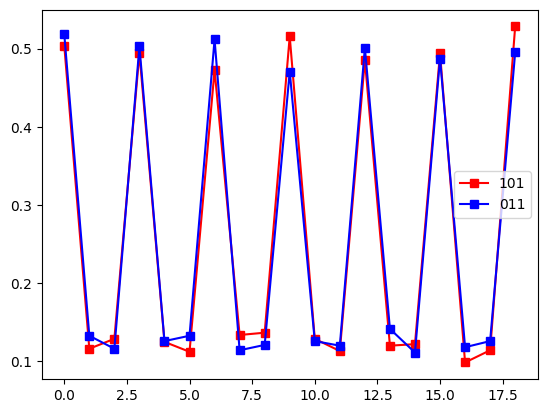

In [197]:
idx = list(range(0,19))
plt.plot(idx, new_all[0:19], "s-", color='r', label="101")
plt.plot(idx, new_all[19:39], "s-", color='b', label="011")
plt.legend(loc='best')

In [252]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
shots = 256
# Load local account information
api_token = "b9a340c91ff05ac9f5cc36eb235cf52f9a5acf42339f8f3e70fa92e35848927ea8765aa1815c15126fbbe2340d68a272953299fdfe59899a2e27913ae7685e4d"
IBMQ.save_account(api_token)
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x:
x.configuration().n_qubits >= 2
and not x.configuration().simulator
and x.status().operational==True))
print("least busy backend: ", backend)
# Run our circuit
def iterate(iter):  
    initial_state = [[1,0], [1,0], [1,0]]
    q = QuantumRegister(3)
    c = ClassicalRegister(3)
    circuit = QuantumCircuit(q,c)
    for i in range(3):
        circuit.initialize(initial_state[i], i)
        circuit.h(i)
    circuit.barrier()
    for i in range(iter):
        circuit.append(oracle, [0,1,2])
        circuit.append(Amp, [0,1,2])
        circuit.barrier()
    circuit.measure([0,1,2], c)
    job = execute(circuit, backend=backend, shots=shots)
    job_monitor(job)
    result = job.result()
    counts = result.get_counts()
    return counts['101'], counts['011']
new_all = []
for i in range(1, 5):
    all.append((iterate(i)[0]/1024, iterate(i)[1]/1024))
for i in range(len(all)):
    new_all.append(all[i][0])
for i in range(len(all)):
    new_all.append(all[i][1])
print(new_all)


configrc.store_credentials:WARNING:2022-10-26 17:39:39,243: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-10-26 17:39:40,275: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_quito
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is queued (17)    

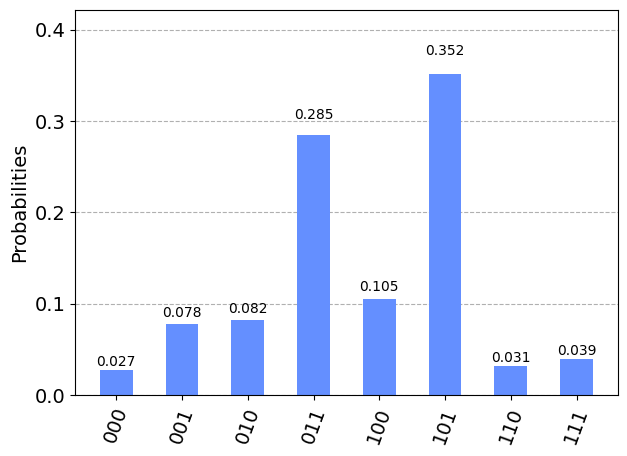

In [251]:
counts = {'000': 7,
 '001': 20,
 '010': 21,
 '011': 73,
 '100': 27,
 '101': 90,
 '110': 8,
 '111': 10}
plot_histogram(counts)

### Problem (f)

In [215]:
q = QuantumRegister(3)
qc = QuantumCircuit(q)
qc.cz(0,2)
qc.cz(1,2)
qc.cz(1,0)

oracle = qc.to_gate()
oracle.name = "Uf"

In [216]:
q = QuantumRegister(3)
amp = QuantumCircuit(q)
for i in range(3):
    amp.h(i)
    amp.x(i)

amp.h(0)
amp.mct([1,2], 0)  # multi-controlled-toffoli
amp.h(0)

for i in range(3):
    amp.x(i)
    amp.h(i)
Amp = amp.to_gate()
Amp.name = "I"

In [242]:
all = []
def iterate(iter):
    initial_state = [[1,0], [1,0], [1,0]]
    q = QuantumRegister(3)
    c = ClassicalRegister(3)
    circuit = QuantumCircuit(q,c)
    for i in range(3):
        circuit.initialize(initial_state[i], i)
        circuit.h(i)
    circuit.barrier()
    for i in range(iter):
        circuit.append(oracle, [0,1,2])
        circuit.append(Amp, [0,1,2])
        circuit.barrier()
    circuit.measure([0,1,2], c)
    
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circuit, simulator, shots = 1024)
    result = job.result()
    counts = result.get_counts()
    # return counts
    return counts['101'], counts['011'],counts['110'],counts['111']
iterate(20)

new_all = []
for i in range(1, 20):
    all.append((iterate(i)[0]/1024, iterate(i)[1]/1024, iterate(i)[2]/1024, iterate(i)[3]/1024))
for i in range(len(all)):
    new_all.append(all[i][0])
print(len(new_all))
for i in range(len(all)):
    new_all.append(all[i][1])
print(len(new_all))
for i in range(len(all)):
    new_all.append(all[i][2])
print(len(new_all))
for i in range(len(all)):
    new_all.append(all[i][3])
print(len(new_all))

19
38
57
76


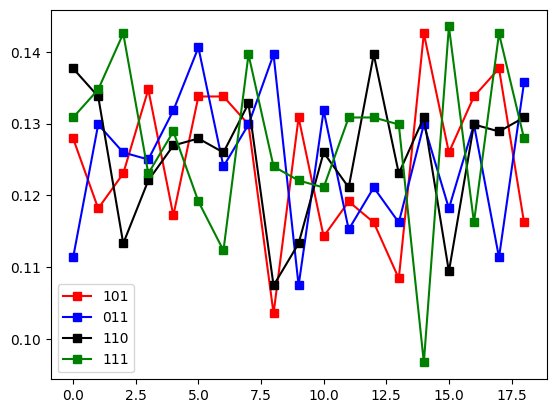

In [244]:
idx = list(range(0,19))
plt.plot(idx, new_all[0:19], "s-", color='r', label="101")
plt.plot(idx, new_all[19:38], "s-", color='b', label="011")
plt.plot(idx, new_all[38:57], "s-", color='black', label="110")
plt.plot(idx, new_all[57:76], "s-", color='g', label="111")
plt.legend(loc='best')

### Bonus


# Question 3

In [37]:
initial_state = [1, 0]
q1 = QuantumRegister(4)
c1 = ClassicalRegister(4)
circuit1 = QuantumCircuit(q1, c1)
for i in range(0, 4):
    circuit1.initialize(initial_state, i)
for i in range(0, 4):
    circuit1.h(i)
circuit1.rz(pi, 0)

q2 = QuantumRegister(4)
c2 = ClassicalRegister(4)
circuit2 = QuantumCircuit(q2, c2)
for i in range(0, 4):
    circuit2.initialize(initial_state, i)
for i in range(0, 4):
    circuit2.h(i)
circuit2.rz(pi/2, 0)
circuit2.ry(pi, 1)

q3 = QuantumRegister(4)
c3 = ClassicalRegister(4)
circuit3 = QuantumCircuit(q3, c3)
for i in range(0, 4):
    circuit3.initialize(initial_state, i)
for i in range(0, 4):
    circuit3.h(i)
circuit3.rz(pi/4, 0)
circuit3.rz(pi, 2)
circuit3.rz(pi/2, 1)

#### Directly measure

{'0100': 602, '1111': 639, '1010': 630, '1100': 582, '1101': 629, '1000': 630, '0110': 609, '1110': 637, '1001': 637, '0101': 628, '0000': 629, '0010': 614, '0001': 624, '1011': 642, '0111': 648, '0011': 620}


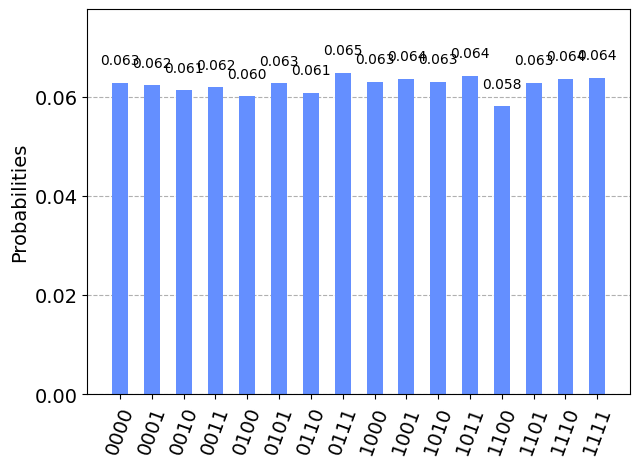

In [38]:
circuit1.measure(q1, c1)
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit1, simulator, shots = 10000)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)


{'1010': 642, '0100': 612, '1100': 643, '0000': 618, '0010': 588, '1011': 644, '0011': 628, '0111': 660, '0001': 639, '1111': 631, '1000': 606, '0110': 631, '1101': 632, '1001': 668, '0101': 573, '1110': 585}


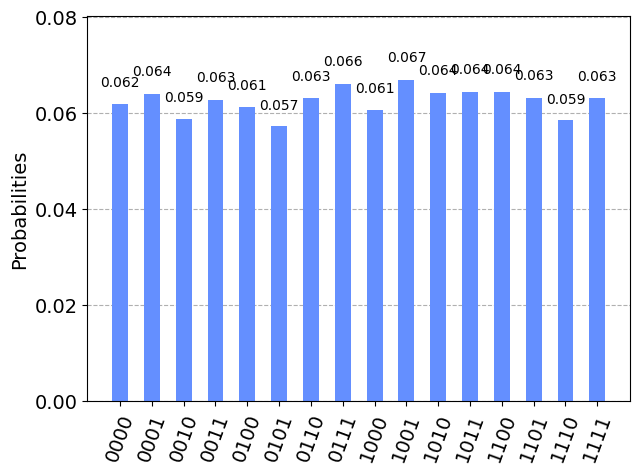

In [39]:
circuit2.measure(q2, c2)
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit2, simulator, shots = 10000)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

{'1101': 651, '1100': 640, '0111': 652, '0011': 617, '1011': 596, '0001': 617, '1111': 640, '0010': 544, '0000': 666, '0110': 659, '1000': 647, '1010': 627, '1110': 623, '1001': 591, '0101': 600, '0100': 630}


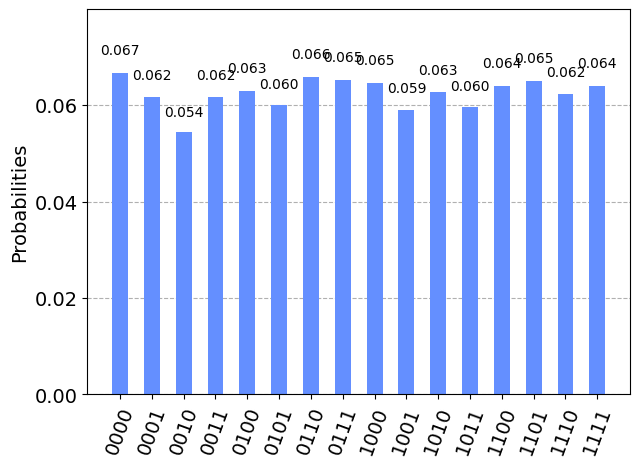

In [40]:
circuit3.measure(q3, c3)
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit3, simulator, shots = 10000)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

### Quatum Fourier Transform

In [41]:
initial_state = [1, 0]
q1 = QuantumRegister(4)
c1 = ClassicalRegister(4)
circuit1 = QuantumCircuit(q1, c1)
for i in range(0, 4):
    circuit1.initialize(initial_state, i)
for i in range(0, 4):
    circuit1.h(i)
circuit1.rz(pi, 0)

q2 = QuantumRegister(4)
c2 = ClassicalRegister(4)
circuit2 = QuantumCircuit(q2, c2)
for i in range(0, 4):
    circuit2.initialize(initial_state, i)
for i in range(0, 4):
    circuit2.h(i)
circuit2.rz(pi/2, 0)
circuit2.ry(pi, 1)

q3 = QuantumRegister(4)
c3 = ClassicalRegister(4)
circuit3 = QuantumCircuit(q3, c3)
for i in range(0, 4):
    circuit3.initialize(initial_state, i)
for i in range(0, 4):
    circuit3.h(i)
circuit3.rz(pi/4, 0)
circuit3.rz(pi, 2)
circuit3.rz(pi/2, 1)

In [42]:
def qft(n):
    """n-qubit QFT the first n qubits in circuit"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cu1(np.pi/float(2**(j-m)), m, j)
    qc.h(j)
    qc.name = "QFT"
    return qc

def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circuit"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cu1(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT"
    return qc

In [43]:
q_circuit = qft_dagger(4)
circuit1.append(q_circuit, range(4))
circuit1.measure(q1, c1)
circuit1.draw()

/tmp/ipykernel_822328/3873028243.py:22: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qc.cu1(-np.pi/float(2**(j-m)), m, j)


┌─────────────────┐┌───┐┌───────┐┌──────┐┌─┐         
q82_0: ┤ Initialize(1,0) ├┤ H ├┤ Rz(π) ├┤0     ├┤M├─────────
       ├─────────────────┤├───┤└───────┘│      │└╥┘┌─┐      
q82_1: ┤ Initialize(1,0) ├┤ H ├─────────┤1     ├─╫─┤M├──────
       ├─────────────────┤├───┤         │  QFT │ ║ └╥┘┌─┐   
q82_2: ┤ Initialize(1,0) ├┤ H ├─────────┤2     ├─╫──╫─┤M├───
       ├─────────────────┤├───┤         │      │ ║  ║ └╥┘┌─┐
q82_3: ┤ Initialize(1,0) ├┤ H ├─────────┤3     ├─╫──╫──╫─┤M├
       └─────────────────┘└───┘         └──────┘ ║  ║  ║ └╥┘
c19: 4/══════════════════════════════════════════╩══╩══╩══╩═
                                                 0  1  2  3

{'1000': 10000}


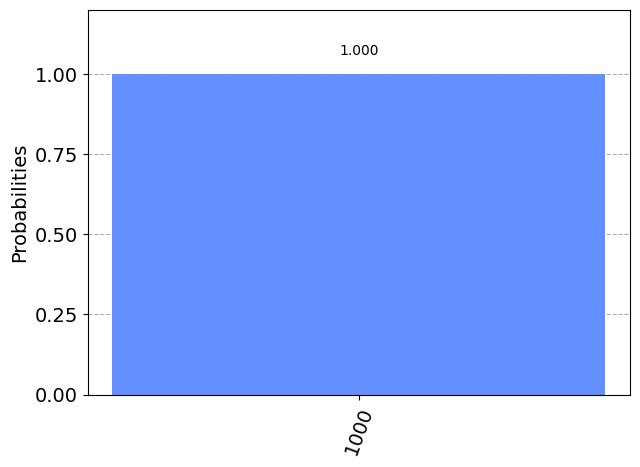

In [44]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit1, simulator, shots = 10000)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [45]:
q_circuit = qft_dagger(4)
circuit2.append(q_circuit, range(4))
circuit2.measure(q2, c2)
circuit2.draw()


/tmp/ipykernel_822328/3873028243.py:22: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qc.cu1(-np.pi/float(2**(j-m)), m, j)


┌─────────────────┐┌───┐┌─────────┐┌──────┐┌─┐         
q83_0: ┤ Initialize(1,0) ├┤ H ├┤ Rz(π/2) ├┤0     ├┤M├─────────
       ├─────────────────┤├───┤└┬───────┬┘│      │└╥┘┌─┐      
q83_1: ┤ Initialize(1,0) ├┤ H ├─┤ Ry(π) ├─┤1     ├─╫─┤M├──────
       ├─────────────────┤├───┤ └───────┘ │  QFT │ ║ └╥┘┌─┐   
q83_2: ┤ Initialize(1,0) ├┤ H ├───────────┤2     ├─╫──╫─┤M├───
       ├─────────────────┤├───┤           │      │ ║  ║ └╥┘┌─┐
q83_3: ┤ Initialize(1,0) ├┤ H ├───────────┤3     ├─╫──╫──╫─┤M├
       └─────────────────┘└───┘           └──────┘ ║  ║  ║ └╥┘
c20: 4/════════════════════════════════════════════╩══╩══╩══╩═
                                                   0  1  2  3

{'0100': 10000}


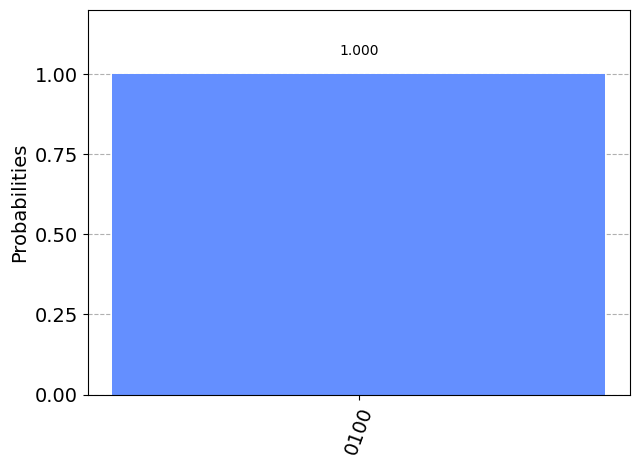

In [46]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit2, simulator, shots = 10000)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [47]:
q_circuit = qft_dagger(4)
circuit3.append(q_circuit, range(4))
circuit3.measure(q3, c3)
circuit3.draw()

/tmp/ipykernel_822328/3873028243.py:22: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qc.cu1(-np.pi/float(2**(j-m)), m, j)


┌─────────────────┐┌───┐┌─────────┐┌──────┐┌─┐         
q84_0: ┤ Initialize(1,0) ├┤ H ├┤ Rz(π/4) ├┤0     ├┤M├─────────
       ├─────────────────┤├───┤├─────────┤│      │└╥┘┌─┐      
q84_1: ┤ Initialize(1,0) ├┤ H ├┤ Rz(π/2) ├┤1     ├─╫─┤M├──────
       ├─────────────────┤├───┤└┬───────┬┘│  QFT │ ║ └╥┘┌─┐   
q84_2: ┤ Initialize(1,0) ├┤ H ├─┤ Rz(π) ├─┤2     ├─╫──╫─┤M├───
       ├─────────────────┤├───┤ └───────┘ │      │ ║  ║ └╥┘┌─┐
q84_3: ┤ Initialize(1,0) ├┤ H ├───────────┤3     ├─╫──╫──╫─┤M├
       └─────────────────┘└───┘           └──────┘ ║  ║  ║ └╥┘
c21: 4/════════════════════════════════════════════╩══╩══╩══╩═
                                                   0  1  2  3

{'0010': 10000}


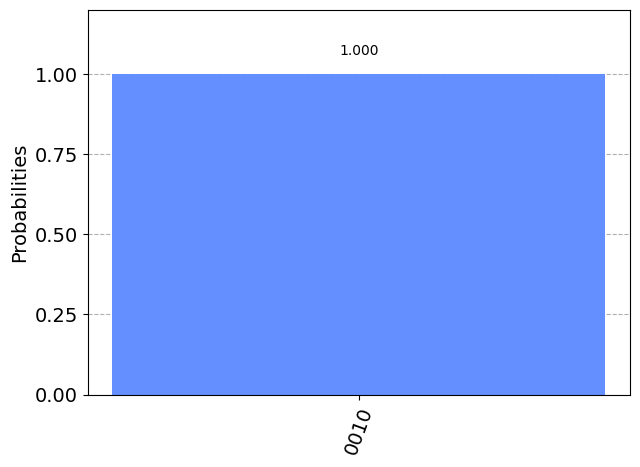

In [48]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit3, simulator, shots = 10000)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# Question 4

[1, 7, 4, 13, 1, 7, 4, 13, 1, 7]


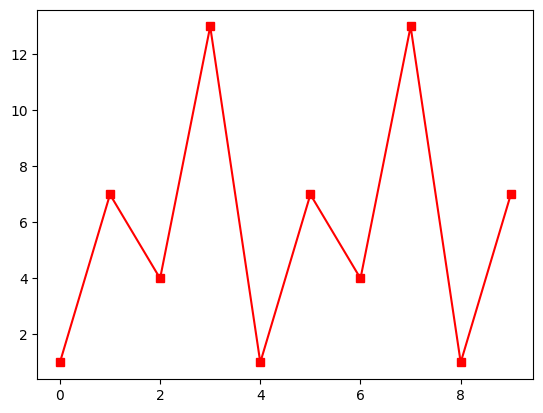

In [245]:
a = []
for x in range(10):
    a.append((7 ** x) % 15)
print(a)
l = list(range(10))
plt.plot(l, a, "s-", color="r")

#### Directly measure on qr2

In [138]:
import matplotlib.pyplot as plt
n_count = 8
a = 7 # a variable that can be adjusted later
# The first 8-qubit register for storing x
qr1 = QuantumRegister(n_count, name="q1")
# The second 4-qubit register for storing f(x)
qr2 = QuantumRegister(4, name="q2")
cr1 = ClassicalRegister(n_count, name="c1")
cr2 = ClassicalRegister(4, name="c2")
qc = QuantumCircuit(qr1, qr2, cr1, cr2)
# qc.draw()

In [139]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11 or 13")
    U = QuantumCircuit(4)
    for iteration in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

In [140]:
for q in range(n_count):
    qc.h(q)
    # And ancilla register in state |1>
qc.x(3+n_count)
    # Do controlled-U operations
for q in range(n_count):
    qc.append(c_amod15(a, 2**q),
    [q] + [i+n_count for i in range(4)])

In [141]:
qc.measure(qr2, cr2)
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots = 5000)
result = job.result()
counts = result.get_counts()
# print(counts)
fig = plt.figure()
fig = plot_histogram(counts, figsize=(15, 15))
fig.savefig("q4-0.png")

<Figure size 640x480 with 0 Axes>

#### Applying QFT

In [53]:
import matplotlib.pyplot as plt
n_count = 8
a = 7 # a variable that can be adjusted later
# The first 8-qubit register for storing x
qr1 = QuantumRegister(n_count, name="q1")
# The second 4-qubit register for storing f(x)
qr2 = QuantumRegister(4, name="q2")
cr1 = ClassicalRegister(n_count, name="c1")
cr2 = ClassicalRegister(4, name="c2")
qc = QuantumCircuit(qr1, qr2, cr1, cr2)

In [54]:
for q in range(n_count):
    qc.h(q)
    # And ancilla register in state |1>
qc.x(3+n_count)
    # Do controlled-U operations
for q in range(n_count):
    qc.append(c_amod15(a, 2**q),
    [q] + [i+n_count for i in range(4)])

In [55]:
qc.measure(qr1, cr1)
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots = 100000)
result = job.result()
counts = result.get_counts()
# print(counts)
fig = plt.figure()
fig = plot_histogram(counts, figsize=(50,20))
fig.savefig("q4-1-1.png")

<Figure size 640x480 with 0 Axes>

In [56]:
import matplotlib.pyplot as plt
n_count = 8
a = 7 # a variable that can be adjusted later
# The first 8-qubit register for storing x
qr1 = QuantumRegister(n_count, name="q1")
# The second 4-qubit register for storing f(x)
qr2 = QuantumRegister(4, name="q2")
cr1 = ClassicalRegister(n_count, name="c1")
cr2 = ClassicalRegister(4, name="c2")
qc = QuantumCircuit(qr1, qr2, cr1, cr2)

In [57]:
for q in range(n_count):
    qc.h(q)
    # And ancilla register in state |1>
qc.x(3+n_count)
    # Do controlled-U operations
for q in range(n_count):
    qc.append(c_amod15(a, 2**q),
    [q] + [i+n_count for i in range(4)])

In [58]:
qc.measure(qr1, cr1)
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots = 100000)
result = job.result()
counts = result.get_counts()
# print(counts)
fig = plt.figure()
fig = plot_histogram(counts, figsize=(50,20))
fig.savefig("q4-1-2.png")

<Figure size 640x480 with 0 Axes>

In [142]:
import matplotlib.pyplot as plt
n_count = 8
a = 7 # a variable that can be adjusted later
# The first 8-qubit register for storing x
qr1 = QuantumRegister(n_count, name="q1")
# The second 4-qubit register for storing f(x)
qr2 = QuantumRegister(4, name="q2")
cr1 = ClassicalRegister(n_count, name="c1")
cr2 = ClassicalRegister(4, name="c2")
qc = QuantumCircuit(qr1, qr2, cr1, cr2)

In [143]:
for q in range(n_count):
    qc.h(q)
    # And ancilla register in state |1>
qc.x(3+n_count)
    # Do controlled-U operations
for q in range(n_count):
    qc.append(c_amod15(a, 2**q),
    [q] + [i+n_count for i in range(4)])

In [144]:
qc.append(qft_dagger(n_count), range(n_count))
# Measure circuit
qc.measure(range(n_count), range(n_count))
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots = 100000)
result = job.result()
counts = result.get_counts()
fig = plt.figure()
fig = plot_histogram(counts, figsize=(15,15))
fig.savefig("q4-2.png")

/tmp/ipykernel_822328/3873028243.py:22: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qc.cu1(-np.pi/float(2**(j-m)), m, j)


<Figure size 640x480 with 0 Axes>

In [62]:
import pandas as pd
from fractions import Fraction
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
rows, measured_phases = [], []
for output in counts:
    decimal = int(output.split(" ")[0] + output.split(" ")[1], 2) # Convert (base 2) string to decimal
    phase = decimal/(2**n_count) # Find corresponding eigenvalue
    measured_phases.append(phase)
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, "%i/%i" % (frac.numerator, frac.denominator), frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)
with open("df.txt", "w", encoding="utf-8") as f:
    print(df, file=f)

   Phase Fraction  Guess for r
0   0.50      1/2            2
1   0.00      0/1            1
2   0.25      1/4            4
3   0.75      3/4            4
